### Contours
Contours are continuous lines or curves that bound or cover the full 
boundary of an object in an image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def pltimage(img,title,value):
    plt.figure(figsize=(10,8))
    for i in range(value):
        plt.subplot(2,2,i+1)
        plt.imshow(img[i],'gray')
        plt.title(title[i])
        plt.xticks([]),plt.yticks([])
    return plt.show() 

Number of Contours found = 3


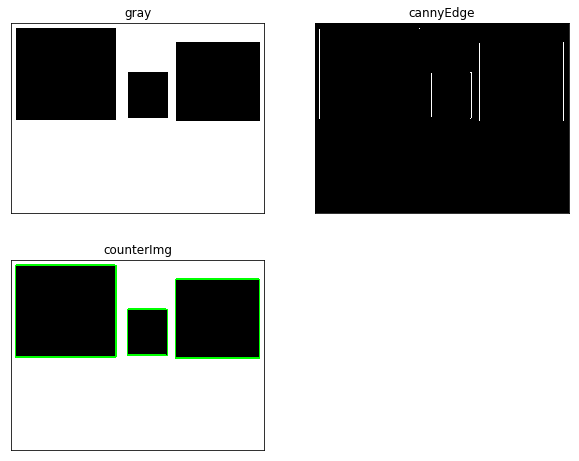

In [35]:
image = cv2.imread('Input/Image/shapes.jpg')
# Grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 30, 100)

# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
_,contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# Use '-1' as the 3rd parameter to draw all
counterImg = cv2.drawContours(image, contours, -1, (0,255,0), 3)


titles = ['gray','cannyEdge','counterImg']
images = [gray,edged,counterImg]

pltimage(images,titles,3)


#### Inner contours with cv2.RETR_LIST / cv2.RETR_TREE

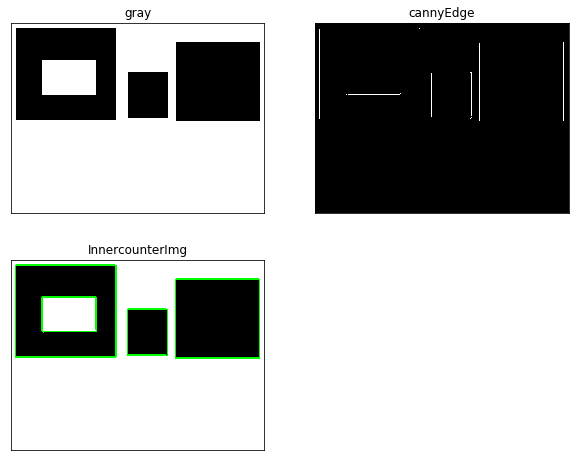

In [38]:
image = cv2.imread('Input/Image/shapes_donut.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 30, 100)
_,contours, hierarchy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
counterImg = cv2.drawContours(image, contours, -1, (0,255,0), 3)
titles = ['gray','cannyEdge','InnercounterImg']
images = [gray,edged,counterImg]

pltimage(images,titles,3)

**cv2.findContours(image, Retrieval Mode, Approximation Method)**

Returns -> contours, hierarchy

**NOTE** In OpenCV 3.X, findContours returns a 3rd argument which is ret (or a boolean indicating if the function was successfully run). 

The variable 'contours' are stored as a numpy array of (x,y) points that form the contour

While, 'hierarchy' describes the child-parent relationships between contours (i.e. contours within contours)



#### Approximation Methods

Using cv2.CHAIN_APPROX_NONE stores all the boundary points. But we don't necessarily need all bounding points. If the points form a straight line, we only need the start and ending points of that line.

Using cv2.CHAIN_APPROX_SIMPLE instead only provides these start and end points of bounding contours, thus resulting in much more efficent storage of contour information..